In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [2]:
folder_path = r'D:\Sem4\Data_298B_Project\298B_Data'
target_size = (200, 200)  # Target size for images

images = []
labels = []
label_counts = {}
label_encoder = LabelEncoder()  # Initialize LabelEncoder

for label in os.listdir(folder_path):
    label_folder = os.path.join(folder_path, label)
    num_images = len(os.listdir(label_folder))
    label_counts[label] = num_images
    for image_name in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, target_size)
        images.append(image)
        labels.append(label)

images = np.array(images)

# Encode labels
label_encoder.fit(labels)
labels_encoded = label_encoder.transform(labels)

In [3]:
for label, count in label_counts.items():
    print(f"Label: {label}, Number of Images: {count}")

Label: African_Swine_Fever, Number of Images: 11
Label: Dry_Skin, Number of Images: 4
Label: Erysipelas, Number of Images: 40
Label: Foot_and_Mouth_Disease, Number of Images: 15
Label: Greasy_Pig_Disease, Number of Images: 26
Label: Hog_Cholera, Number of Images: 22
Label: Mastitis, Number of Images: 20
Label: PDNS, Number of Images: 17
Label: Pityriasis_Rosea, Number of Images: 18
Label: Ringworm, Number of Images: 25
Label: Sarcoptic_mange, Number of Images: 26
Label: Swine_Pox, Number of Images: 21
Label: Swine_Vesicular_Disease, Number of Images: 16


In [4]:
# Get the encoded labels for each label class
encoded_labels_dict = {}
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    encoded_labels_dict[label] = encoded_label

# Print the encoded labels for each label class
for label, encoded_label in encoded_labels_dict.items():
    print(f"Label: {label}, Encoded Label: {encoded_label}")

Label: African_Swine_Fever, Encoded Label: 0
Label: Dry_Skin, Encoded Label: 1
Label: Erysipelas, Encoded Label: 2
Label: Foot_and_Mouth_Disease, Encoded Label: 3
Label: Greasy_Pig_Disease, Encoded Label: 4
Label: Hog_Cholera, Encoded Label: 5
Label: Mastitis, Encoded Label: 6
Label: PDNS, Encoded Label: 7
Label: Pityriasis_Rosea, Encoded Label: 8
Label: Ringworm, Encoded Label: 9
Label: Sarcoptic_mange, Encoded Label: 10
Label: Swine_Pox, Encoded Label: 11
Label: Swine_Vesicular_Disease, Encoded Label: 12


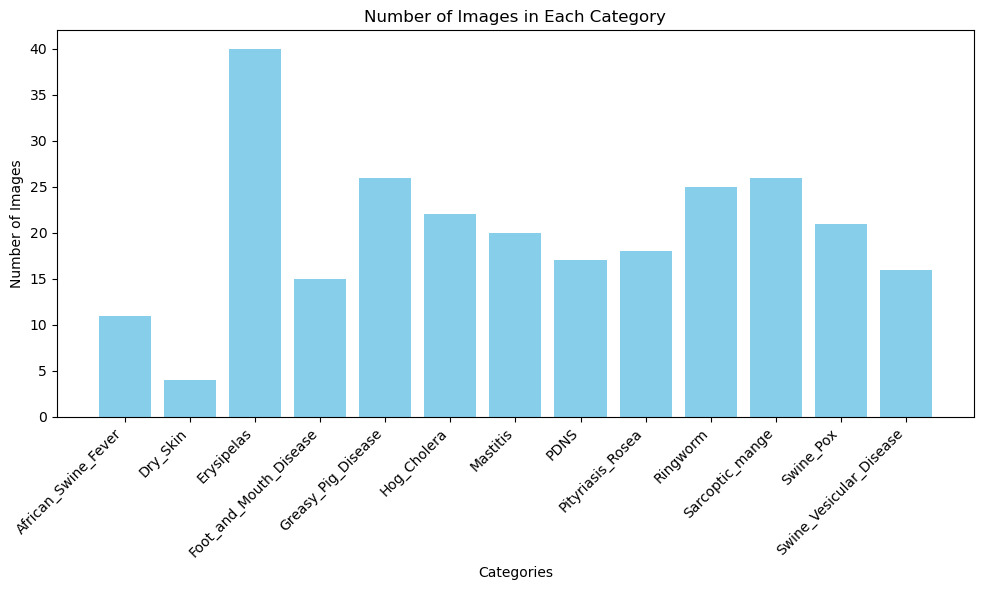

In [5]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

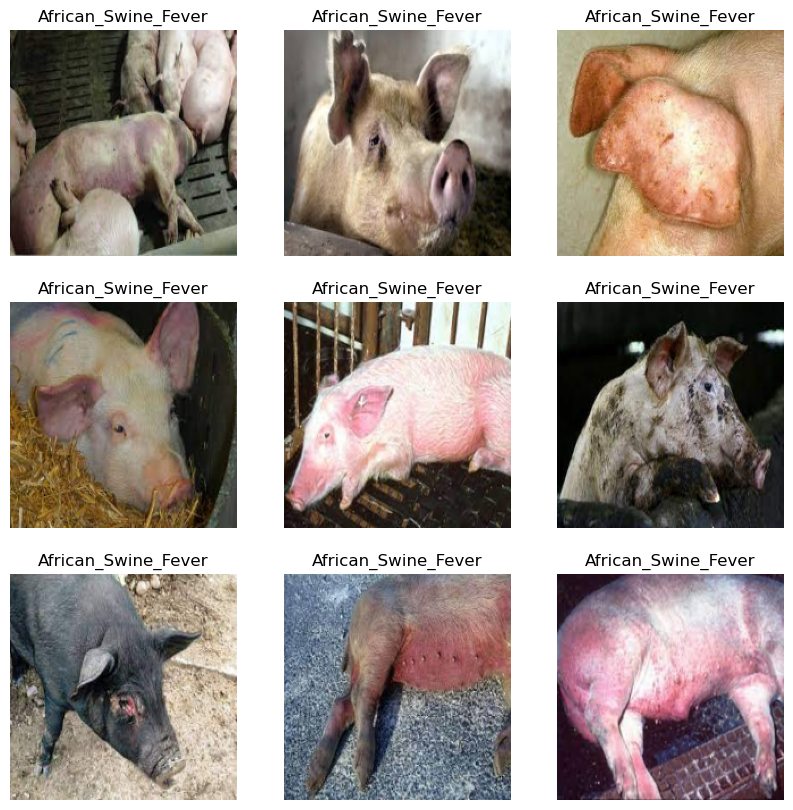

In [6]:
# Visualize cropped images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [7]:
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=False,
#     fill_mode='nearest'
# )

# augmented_images = datagen.flow(np.array(images), labels_encoded, batch_size=9)
# augmented_batch = augmented_images.next()

# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i+1)
#     plt.imshow(augmented_batch[0][i].astype('uint8'))  # Display augmented images
#     plt.title(label_encoder.inverse_transform([augmented_batch[1][i]])[0])  # Display label
#     plt.axis('off')
# plt.show()

# # Step 4: Plot Histogram
# plt.figure(figsize=(10, 6))
# plt.hist(label_encoder.inverse_transform(labels_encoded), bins=len(np.unique(labels_encoded)), edgecolor='black')
# plt.xlabel('Label')
# plt.ylabel('Number of Images')
# plt.title('Number of Images in Each Label after Data Augmentation')
# plt.xticks(rotation=45)
# plt.show()

# # Step 3: Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# # Step 4: Generate augmented data for training
# train_generator = datagen.flow(
#     np.array(X_train), y_train,
#     batch_size=32
# )

In [8]:
# Step 2: Extract Features using InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)
preprocessed_images = preprocess_input(images)
features = model.predict(preprocessed_images)
print("Features shape:", features.shape)  # Print the shape of features
print("Features:", features)  # Print the features themselves

9/9 [==============================] - 23s 2s/step
Features shape: (261, 2048)
Features: [[0.43134034 0.8390574  0.         ... 0.         1.6045251  1.8248746 ]
 [1.8193045  0.23294039 0.         ... 0.15543751 0.0094041  0.74877995]
 [1.7900469  0.08576129 0.06008746 ... 0.17993212 1.0885485  0.11157048]
 ...
 [0.35629737 3.9048758  0.         ... 0.35956755 0.32320476 1.677039  ]
 [1.0716383  0.03895052 0.98805624 ... 1.3646874  0.7998382  0.5227477 ]
 [0.89235663 1.5552098  0.37003767 ... 0.31793627 0.75335014 2.076419  ]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
num_classes = len(np.unique(labels_encoded))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
y_test

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 

#### The y_train output you provided is a NumPy array containing the one-hot encoded labels for the training data. Each row represents a sample, and each column represents a class. If you have N classes, then each row will have N elements, where each element indicates whether the corresponding class is present or not.

In [11]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (208, 2048)
Shape of X_test: (53, 2048)


In [20]:
import tensorflow as tf
from yolov4.tf import YOLOv4

# Step 4: Train YOLOv8 for Classification

# Define YOLOv8 model
yolo = YOLOv4(tiny=False)
yolo.classes = num_classes  # Set the number of classes
yolo.make_model()
yolo.summary()

# Compile the model
yolo.compile(
    optimizer=tf.keras.optimizers.Adam(lr=1e-4),
    loss={
        "output_0": "categorical_crossentropy",
        "output_1": "categorical_crossentropy",
        "output_2": "categorical_crossentropy",
    },
)

# Train the model
history = yolo.fit(
    x=X_train,
    y={"output_0": y_train, "output_1": y_train, "output_2": y_train},  # YOLOv8 has three output branches
    batch_size=32,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=(X_test, {"output_0": y_test, "output_1": y_test, "output_2": y_test}),
)

# Evaluate the model
loss, accuracy = yolo.evaluate(X_test, {"output_0": y_test, "output_1": y_test, "output_2": y_test})
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

ModuleNotFoundError: No module named 'yolov4'